In [3]:
import tensorflow as tf
import keras as klinkcode
from tf_keras.layers import Input, Lambda, Dense, Flatten
from tf_keras.models import Model, Sequential
from tf_keras.applications.vgg16 import VGG16, preprocess_input
from tf_keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tf_keras.utils import load_img, img_to_array
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [1]:
IMAGE_SIZE = [224, 224]

In [3]:
train_directory =  "/Users/halilbugday/Desktop/ImageProcess/data/train/"
test_directory = "/Users/halilbugday/Desktop/ImageProcess/data/test/"
#path ckeck
img = load_img(test_directory + "015.Bald_eagle/012.jpg")

(224, 224, 3)


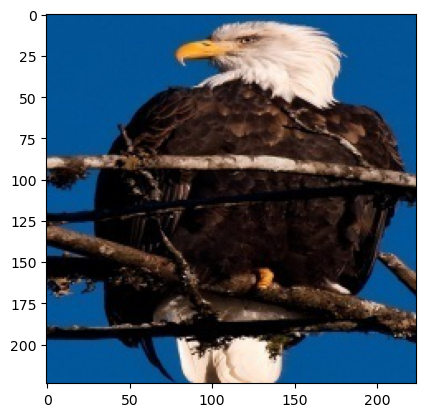

In [4]:
print(img_to_array(img).shape)
plt.imshow(img)
plt.show()

In [7]:
train_data = ImageDataGenerator().flow_from_directory(train_directory)
test_data = ImageDataGenerator().flow_from_directory(test_directory)

Found 10190 images belonging to 57 classes.
Found 964 images belonging to 57 classes.


In [11]:
vgg = VGG16(
    input_shape = IMAGE_SIZE + [3],
    weights = 'imagenet',
    include_top = False
)

for layer in vgg.layers:
    layer.trainable = False

In [12]:
#if you will want to add more spicies ++
number_of_bird_types = 57 # number of classes

In [13]:
x = Flatten() (vgg.output)
x = Dense(1000, activation='relu') (x)
pred_layer = Dense(number_of_bird_types, activation='softmax')(x)

In [14]:
model = Model(inputs = vgg.input, outputs = pred_layer)

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [16]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [17]:
train_datagen=ImageDataGenerator(
    rescale= 1./255, #
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip= True
)

test_datagen=ImageDataGenerator(
    rescale=1./255 #
)

In [18]:
training_set=train_datagen.flow_from_directory(
    directory= train_directory,
    target_size= (224,224),
    batch_size= 32,
    class_mode='categorical'
)

test_set=test_datagen.flow_from_directory(
    directory=test_directory,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

Found 10190 images belonging to 57 classes.
Found 964 images belonging to 57 classes.


In [19]:
len(training_set), len(test_set)

(319, 31)

In [20]:
r=model.fit(
    training_set,
    validation_data=test_set,
    epochs= 15,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

for epoch in range(len(r.history['accuracy'])):
    print("Epoch:", epoch + 1)
    print("Training Accuracy:", r.history['accuracy'][epoch])
    print("Validation Accuracy:", r.history['val_accuracy'][epoch])

    # Precision, recall ve F1 score
    predictions = model.predict(test_set)
    predicted_classes = predictions.argmax(axis=1)
    true_classes = test_set.classes
    class_labels = list(test_set.class_indices.keys())

    cm = confusion_matrix(true_classes, predicted_classes)
    report = classification_report(true_classes, predicted_classes, target_names=class_labels)

    print("Confusion Matrix:")
    print(cm)

    print("Classification Report:")
    print(report)

Epoch 1/15
319/319 [==============================] - 4220s 13s/step - loss: 2.2525 - accuracy: 0.5265 - val_loss: 0.9979 - val_accuracy: 0.7261
Epoch 2/15
319/319 [==============================] - 4473s 14s/step - loss: 0.7848 - accuracy: 0.7724 - val_loss: 0.7011 - val_accuracy: 0.7936
Epoch 3/15
319/319 [==============================] - 4318s 14s/step - loss: 0.5112 - accuracy: 0.8529 - val_loss: 0.5971 - val_accuracy: 0.8164
Epoch 4/15
319/319 [==============================] - 4021s 13s/step - loss: 0.4114 - accuracy: 0.8765 - val_loss: 0.6838 - val_accuracy: 0.8050
Epoch 5/15
319/319 [==============================] - 3994s 13s/step - loss: 0.3402 - accuracy: 0.8953 - val_loss: 0.7221 - val_accuracy: 0.8216
Epoch 6/15
319/319 [==============================] - 3848s 12s/step - loss: 0.2737 - accuracy: 0.9143 - val_loss: 0.6738 - val_accuracy: 0.8340
Epoch 7/15
319/319 [==============================] - 3936s 12s/step - loss: 0.2468 - accuracy: 0.9237 - val_loss: 0.7670 - val_ac

In [37]:
predictions = model.predict(test_set)
predicted_classes = predictions.argmax(axis=1)
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())

cm = confusion_matrix(true_classes, predicted_classes)
report = classification_report(true_classes, predicted_classes, target_names=class_labels)

print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(report)

31/31 [==============================] - 335s 11s/step
Confusion Matrix:
[[1 0 1 ... 1 0 0]
 [0 0 0 ... 0 0 1]
 [1 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 1 0 1]
 [0 0 0 ... 0 1 0]
 [0 1 0 ... 0 0 0]]
Classification Report:
                              precision    recall  f1-score   support

                 001.Rooster       0.07      0.07      0.07        15
                     002.Hen       0.00      0.00      0.00        10
                 003.Ostrich       0.00      0.00      0.00        15
               004.Brambling       0.08      0.07      0.07        15
               005.Goldfinch       0.00      0.00      0.00        25
              006.Housefinch       0.11      0.08      0.09        25
                   007.Junco       0.05      0.04      0.04        25
          008.Indigo_bunting       0.00      0.00      0.00        14
          009.Robin_american       0.00      0.00      0.00        15
    010.Red_Whiskered_Bulbul       0.00      0.00      0.00        15
             

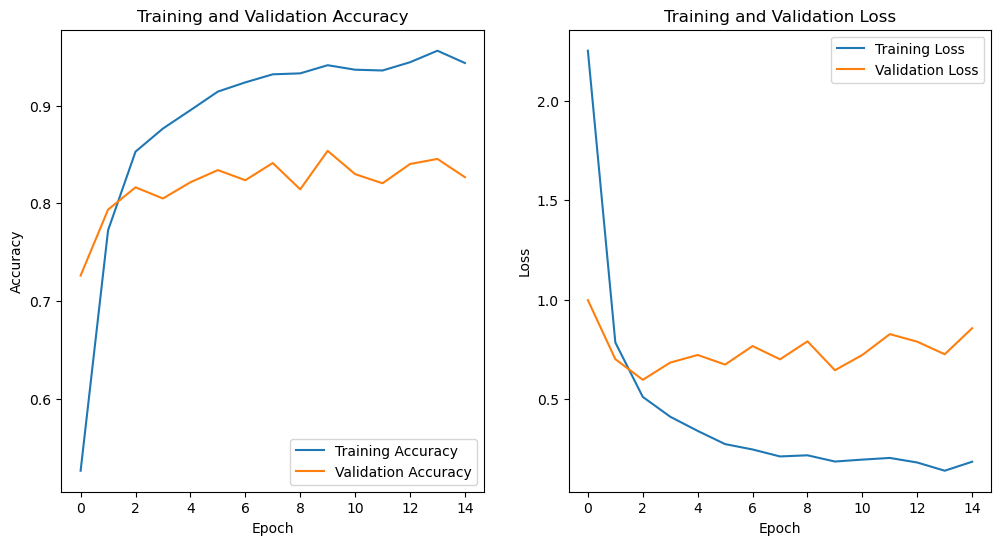

In [39]:
report_data = []
lines = report.split('\n')
for line in lines[2:-5]:
    row = {}
    row_data = line.split()
    row['class'] = row_data[0]
    row['precision'] = float(row_data[1])
    row['recall'] = float(row_data[2])
    row['f1-score'] = float(row_data[3])
    row['support'] = float(row_data[4])
    report_data.append(row)
report_df = pd.DataFrame(report_data)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(r.history['accuracy'], label='Training Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(r.history['loss'], label='Training Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()




In [35]:
model.save("model.h5")

/Users/halilbugday/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
from tensorflow import keras
model= keras.models.load_model("model.h5")

(1, 224, 224, 3)
4


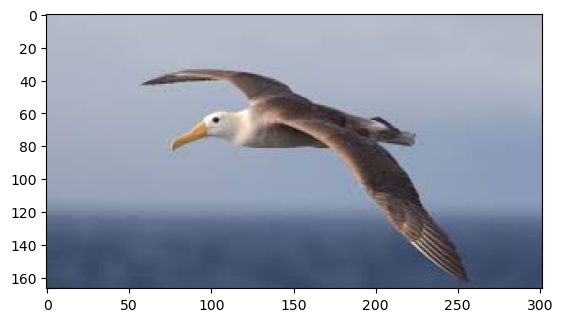

In [41]:
from keras.utils import load_img, img_to_array
from PIL import Image

img = Image.open("test1.jpeg").resize((224,224))
img = np.array(img)
img.shape
img = img.reshape(-1,224,224,3)
print(img.shape)
print(img.ndim)
img = preprocess_input(img)
img_for_disp = load_img("test1.jpeg")
plt.imshow(img_for_disp)
plt.show()

In [42]:
preds = model.predict(img)
preds

1/1 [==============================] - 1s 517ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 6.8465227e-29, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.2057778e-25, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 5.7709301e-17, 0.0000000e+00,
        2.8288169e-10, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00]], dtype=float32)